# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:

Cara kerja k-means clustering adlaah dengan cara menentukan jumlah cluster (k), kemudian menginisialisasi centroid (titik pusat dari masing-masing cluster). Setelah itu, setiap titik data kemudian diassign ke centroid terdekat dengan kata lain setia data akan menjadi bagian dari cluster. Hal ini dihitung berulang hingga hasil jaraknya konvergen.

Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = pd.read_csv('/content/pelanggan_supermarket.csv')
# df.head()
df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan..
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-14-06963a215594>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters


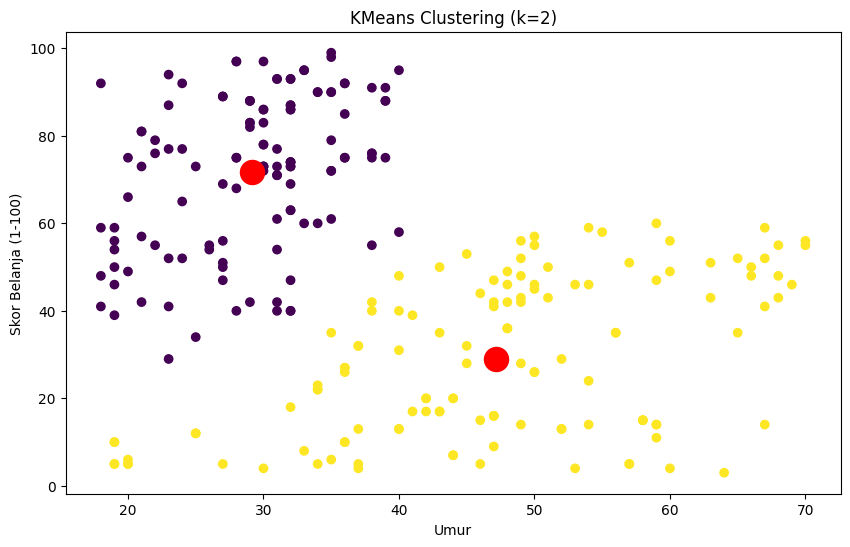

In [14]:
# Handling missing value dengan menggunakan method ='ffill'
df.fillna(method='ffill', inplace=True)

# Handling outlier menggunakan metode Interquartile range
Q1 = df[['Umur', 'Skor Belanja (1-100)']].quantile(0.25)
Q3 = df[['Umur', 'Skor Belanja (1-100)']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df[['Umur', 'Skor Belanja (1-100)']] < lower_bound) |
              (df[['Umur', 'Skor Belanja (1-100)']] > upper_bound)).any(axis=1)]

# Lakukan rescaling data menggunakan StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Umur', 'Skor Belanja (1-100)']])

# Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan..
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

df['Cluster'] = clusters

# Centroid
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.scatter(df['Umur'], df['Skor Belanja (1-100)'], c=df['Cluster'])
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='o')
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.title('KMeans Clustering (k=2)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

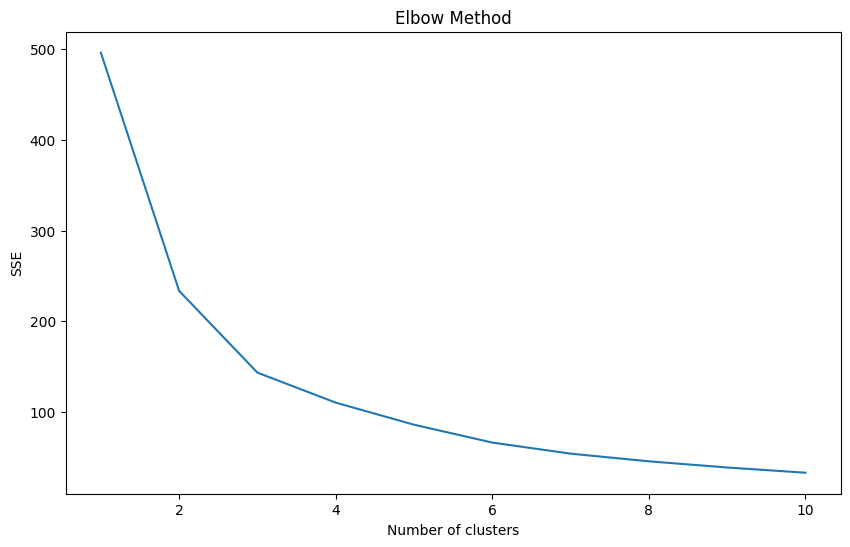

In [15]:
# Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-16-4f91b01f248f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster_3'] = clusters_3


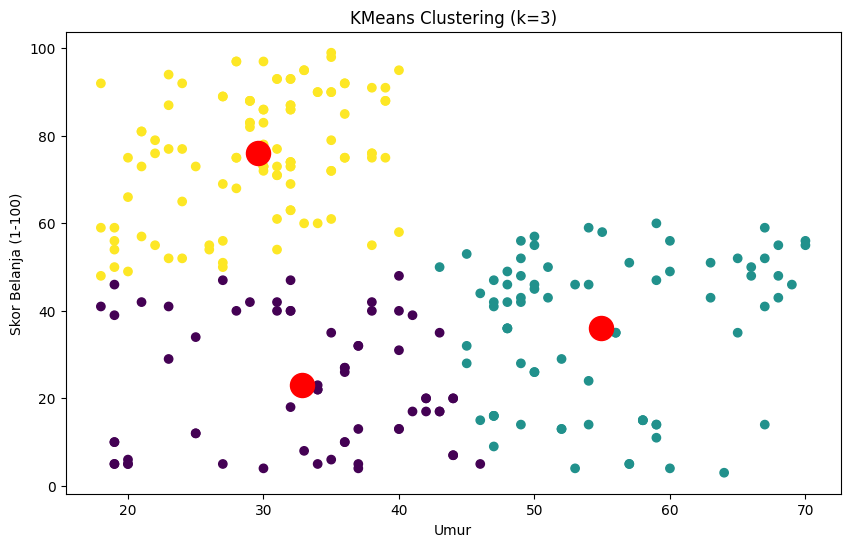

In [16]:
# Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan

kmeans_3 = KMeans(n_clusters=3, random_state=42)

clusters_3 = kmeans_3.fit_predict(data_scaled)

df['Cluster_3'] = clusters_3

# Visualisasi clusters  k=3 dengan centroids
plt.figure(figsize=(10, 6))
plt.scatter(df['Umur'], df['Skor Belanja (1-100)'], c=df['Cluster_3'])
centroids_3 = scaler.inverse_transform(kmeans_3.cluster_centers_)
plt.scatter(centroids_3[:, 0], centroids_3[:, 1], s=300, c='red')
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.title('KMeans Clustering (k=3)')
plt.show()

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)

In [17]:
# Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut

silhouette_3 = silhouette_score(data_scaled, clusters_3)
silhouette_2 = silhouette_score(data_scaled, clusters)

print(f'Silhouette Coefficient  k=3: {silhouette_3}')
print(f'Silhouette Coefficient  k=2: {silhouette_2}')

Silhouette Coefficient  k=3: 0.4658669848365053
Silhouette Coefficient  k=2: 0.48555152598842644




---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket.

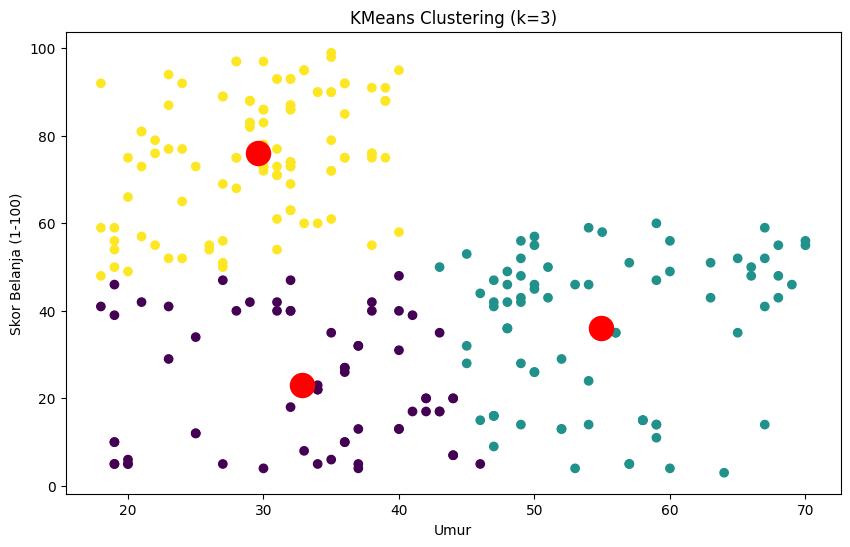

Jawab disini:

Analisis setiap cluster

**Cluster 1: Pelanggan berumur tua dengan skor belanja rendah/sedang**

Umur: Pelanggan dalam cluster ini cenderung lebih tua.

Skor Belanja: Memiliki skor belanja yang rendah/sedang.

Karakteristik: Pelanggan ini sepertinya orang dewasa yang lebih tua atau pensiunan yang cenderung berbelanja lebih sedikit dan lebih bijak dalam pengeluaran.

Strategi untuk kemajuan: Supermarket bisa membuat diskon belanja terutama untuk bahan-bahan pokok ynng dibutuhkan oleh kalangan tua. Misal mengggunakan tebus murah, paket hemat (menggabungkan beberapa kebutuhan menjadi 1 dan biaya yang dikeluarkan lebih murah). Selain itu bisa juga menambahkan produk yang multifungsi.


**Cluster 2: Pelanggan berumur muda dengan skor belanja rendah/sedang**

Umur: Pelanggan dalam cluster ini cenderung lebih muda.

Skor BElanja: Memiliki skor belanja yang rendah/sedang.

Karakteristik: Pelanggan ini sepertinya adalah kalangan muda yang lebih menyukai belanja secara online, tidak langsung belanja ke supermarket. Pemuda lebih suka belanja secara online karena efisiensi waktu, tenaga, dan harga bersaing lebih terjangkau.

Strategi untuk kemajuan: Supermarket bisa membuat layanan pesan antar (online) agar mempermudah mereka dalam belanja. Supermarket juga bisa dibuat lebih menarik perhatian kalangan muda. Misalnya membuat spot untuk nongkrong dan instagramable. Jadi, belanja ke supermarket bisa menjadi style baru bagi kalangan muda.


**Cluster 3: Pelanggan berumur muda dengan skor belanja tinggi**

Umur: Pelanggan dalam cluster ini cenderung lebih muda.

Skor BElanja: Memiliki skor belanja yang tinggi.

Karakteristik: Pelanggan ini sepertinya adalah kalangan muda yang lebih menyukai belanja ke supermarket.

Strategi untuk kemajuan: Supermarket bisa menjadikan mereka sebagai pelanggan setia dengan cara menjadi member aktif di supermarket sehingga bisa mendapatkan banyak keistimewaan. Selain itu, untuk mempertahankan pelanggan ini, supermarket bisa menggandeng influenzer yang diidolakan kalangan muda untuk menjadi brand ambasador sebagai penarik perhatian kalangan muda.


